In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/APS360/Project/MMAFEDB.zip' -d '/root/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /root/datasets/MMAFEDB/train/disgust/Disgust.11622.jpg  
  inflating: /root/datasets/__MACOSX/MMAFEDB/train/disgust/._Disgust.11622.jpg  
  inflating: /root/datasets/MMAFEDB/train/disgust/40273Exp1distressed_european_201.jpg  
  inflating: /root/datasets/__MACOSX/MMAFEDB/train/disgust/._40273Exp1distressed_european_201.jpg  
  inflating: /root/datasets/MMAFEDB/train/disgust/82324Exp1amazed_actor_400.jpg  
  inflating: /root/datasets/__MACOSX/MMAFEDB/train/disgust/._82324Exp1amazed_actor_400.jpg  
  inflating: /root/datasets/MMAFEDB/train/disgust/Disgust.18612.jpg  
  inflating: /root/datasets/__MACOSX/MMAFEDB/train/disgust/._Disgust.18612.jpg  
  inflating: /root/datasets/MMAFEDB/train/disgust/32249Exp1disgust_face_541.jpg  
  inflating: /root/datasets/__MACOSX/MMAFEDB/train/disgust/._32249Exp1disgust_face_541.jpg  
  inflating: /root/datasets/MMAFEDB/train/disgust/31189Exp1boring_girl_203.jpg  
  inflating: /root/datasets

In [ ]:
import torchvision.models
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from torchvision.models import ResNet152_Weights
resnet = torchvision.models.resnet.resnet152(weights=ResNet152_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet = resnet.cuda()

In [ ]:
num_in = resnet.fc.in_features
resnet.fc = nn.Linear(num_in, 7)
resnet.fc = resnet.fc.cuda()

In [ ]:
!nvidia-smi

Sun Aug  7 05:58:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    36W / 250W |    877MiB / 16280MiB |     14%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

1667
343
Data loaded, training begin
Epoch 1: Train accuracy: 0.6962536563414086 |Validation accuracy: 0.4747900693683826
Epoch 2: Train accuracy: 0.7663429085727144 |Validation accuracy: 0.46913106973347934
Epoch 3: Train accuracy: 0.8176629415735394 |Validation accuracy: 0.49541803577948157
Epoch 4: Train accuracy: 0.8349883747093678 |Validation accuracy: 0.5038152610441767
Epoch 5: Train accuracy: 0.8473074326858172 |Validation accuracy: 0.5069185834246075
Epoch 6: Train accuracy: 0.8582014550363759 |Validation accuracy: 0.4949616648411829
Epoch 7: Train accuracy: 0.8470636765919148 |Validation accuracy: 0.5185104052573932
Epoch 8: Train accuracy: 0.8463136578414461 |Validation accuracy: 0.46821832785688206
Epoch 9: Train accuracy: 0.8584827120678017 |Validation accuracy: 0.48838992332968234
Epoch 10: Train accuracy: 0.8592889822245556 |Validation accuracy: 0.4835523913837167
Epoch 11: Train accuracy: 0.8524825620640516 |Validation accuracy: 0.4852866009492515
Epoch 12: Train accura

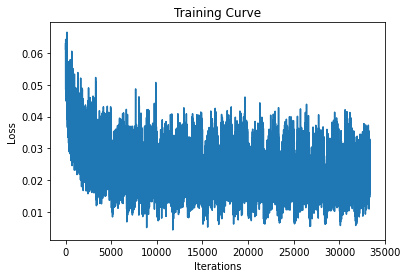

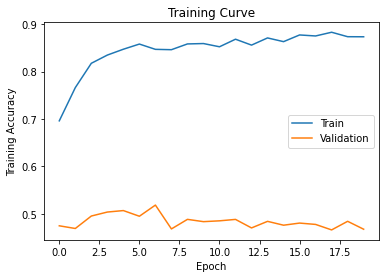

Final Training Accuracy: 0.8735768394209855
Final Validation Accuracy: 0.46757940854326396


In [ ]:
use_cuda = True
model = resnet
train(model, batch_size = 32, learning_rate = 0.005, num_epochs = 20)

In [ ]:
def get_accuracy(model, loader):

    correct = 0
    total = 0
    for imgs, labels in loader:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return 0.05 + correct / total

In [ ]:
# It's not completely new; I only changed the data feeding into dataloader to alexnet feature-tensors; others remained the same
def train(model, batch_size=32, learning_rate=0.01, num_epochs=30):
    torch.manual_seed(1000)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers = 0, shuffle = True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, num_workers = 0, shuffle = True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.002)

    iters, losses, train_acc, val_acc, epoches = [], [], [], [], []

    print(len(train_loader))
    print(len(val_loader))
    print("Data loaded, training begin")
    model.train()
    # training
    n = 0 
    # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            #print("GPU done.")
            
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            #print("Calculated")
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1

        epoches.append(epoch)
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        model.eval()
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        model.train()
        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   val_acc[epoch]))
        path = "model_{0}_bs{1}_lr{2}_epoch{3}".format("resnet152",
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
        torch.save(model.state_dict(), path)


    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epoches, train_acc, label="Train")
    plt.plot(epoches, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

Data processing and augmentation: 

In [ ]:
# define training and test data directories
data_dir = '/root/datasets/MMAFEDB'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [ ]:
# resize all images to 224 x 224
data_transform =  transforms.Compose([transforms.Resize((224,224)), 
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(35),
                                transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

valid_transfrom = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#train_dir = "/content/gdrive/MyDrive/APS360/Project/Small_dataset/train"
#val_dir = "/content/gdrive/MyDrive/APS360/Project/Small_dataset/val"


train_data = datasets.ImageFolder(train_dir, transform=valid_transfrom)
val_data = datasets.ImageFolder(val_dir, transform=valid_transfrom)
#test_data = datasets.ImageFolder(test_dir, transform=data_transform)

augmented_data = []
for i in range(100):
    new = datasets.ImageFolder(train_dir, transform=data_transform)
    for j, item in enumerate(new):
        if j >= 20:
            break
        augmented_data.append(item)

train_data = torch.utils.data.ConcatDataset([train_data, augmented_data])
# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
#print('Num testing images: ', len(test_data))

Num training images:  53332
Num validation images:  10956


In [ ]:
augment_loader = torch.utils.data.DataLoader(augmented_data, batch_size=1, 
                                           num_workers=0, shuffle=True)

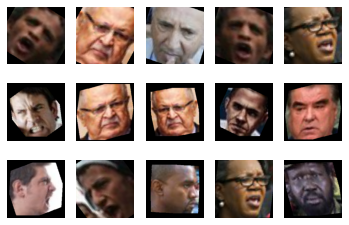

In [ ]:
k = 0
for images, labels in augment_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

AlexNet:

In [ ]:
# define dataloader parameters
batch_size  = 1
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

torch.Size([1, 256, 6, 6])

In [ ]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
default = "/content/gdrive/MyDrive/APS360/Project/alex_feature"
# The tensors are saved under the default directory
n = 0
for imgs, labels in iter(train_loader):
    features = alexnet.features(imgs)
    new_tensor = torch.from_numpy(features.detach().numpy())
    torch.save(new_tensor.squeeze(0), default + '/train/' + classes[labels] + '/' + str(n) + '.tensor')
    n += 1

n = 0
for imgs, labels in iter(val_loader):
    features = alexnet.features(imgs)
    new_tensor = torch.from_numpy(features.detach().numpy())
    torch.save(new_tensor.squeeze(0), default + '/val/' + classes[labels] + '/' + str(n) + '.tensor')
    n += 1


NameError: ignored

In [ ]:
#Artifical Neural Network Architecture
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = "ANNClassifier"
        self.fc1 = nn.Linear(256 * 6 * 6, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20,7)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
default = "/content/gdrive/MyDrive/APS360/Project/alex_feature"
train_alex = torchvision.datasets.DatasetFolder(default + '/train/', loader=torch.load, extensions=('.tensor'))
val_alex = torchvision.datasets.DatasetFolder(default + '/val/', loader=torch.load, extensions=('.tensor'))


FileNotFoundError: ignored

In [ ]:
train_alex[0][0].shape

torch.Size([256, 6, 6])

In [ ]:
len(train_alex)

1503

In [ ]:
len(train_loader)

1503

In [ ]:
class new_CNN(nn.Module):
    def __init__(self):
        super(new_CNN, self).__init__()
        self.name = "new_CNN"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.conv2 = nn.Conv2d(256, 512, 3)
        self.fc1 = nn.Linear(512 * 2 * 2, 32)
        self.fc2 = nn.Linear(32, 7)
        self.dropout1 = nn.Dropout(0.4) # drop out layer with 20% dropped out neuron
        self.dropout2 = nn.Dropout(0.4)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 512 * 2 * 2)
        x = F.relu(self.fc1(self.dropout1(x)))
        x = self.fc2(self.dropout2(x))
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
# It's not completely new; I only changed the data feeding into dataloader to alexnet feature-tensors; others remained the same
def train(model, batch_size=32, learning_rate=0.01, num_epochs=30):
    torch.manual_seed(1000)
    train_loader = torch.utils.data.DataLoader(train_alex, batch_size=batch_size, num_workers = 0, shuffle = True)
    val_loader = torch.utils.data.DataLoader(val_alex, batch_size=batch_size, num_workers = 0, shuffle = True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.002)

    iters, losses, train_acc, val_acc, epoches = [], [], [], [], []

    print(len(train_loader))
    print(len(val_loader))
    print("Data loaded, training begin")
    # training
    n = 0 
    # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            #print("GPU done.")
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            #print("Calculated")
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1

        epoches.append(epoch)
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   val_acc[epoch]))
        path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), path)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epoches, train_acc, label="Train")
    plt.plot(epoches, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
use_cuda = True
classification_model = new_CNN()
if use_cuda and torch.cuda.is_available():
  print("On GPU")
  classification_model.cuda() 
else:
  print("On CPU")
train(classification_model, batch_size = 32, learning_rate = 0.01, num_epochs=60)

On GPU


NameError: ignored

In [ ]:
alex_model = new_CNN()
state = torch.load("/content/model_new_CNN_bs32_lr0.005_epoch29")
alex_model.load_state_dict(state)


<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


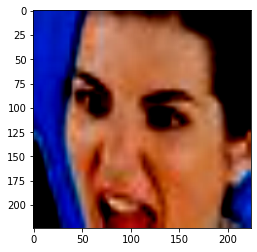

In [ ]:
plt.imshow(train_data[0][0].permute(1,2,0))


In [ ]:
feature = alexnet.features(train_data[0][0])
feature.size()

torch.Size([256, 6, 6])

In [ ]:
print(F.softmax(alex_model(feature)))

NameError: ignored

In [ ]:
def get_accuracy(model, loader):

    correct = 0
    total = 0
    for imgs, labels in loader:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path